In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(1)

In [54]:
random.uniform(-1,1)

0.6948674738744653

In [51]:
def SEuler(t,S,I,beta):
    return -beta*S*I
def IEuler(t,I,S,beta,eta):
    return beta*S*I-eta*I
def REuler(t,I,eta):
    return eta*I

def SIReuler(t0, tf, dt, S0, I0, R0):
    t, S, I, R= t0, S0, I0, R0
    beta=.01
    eta=.05
    points = [[t,S,I,R]]
    while t <= tf:
        if 9.9 < t and t <10.1:
            S += dt*SEuler(t,S,I,beta)+25
        else:
            S += dt*SEuler(t,S,I,beta)
        I += dt*IEuler(t,I,S,beta,eta)
        R += dt*REuler(t,I,eta)
        t += dt               
        points.append([t,S,I,R])
    return np.array(points)

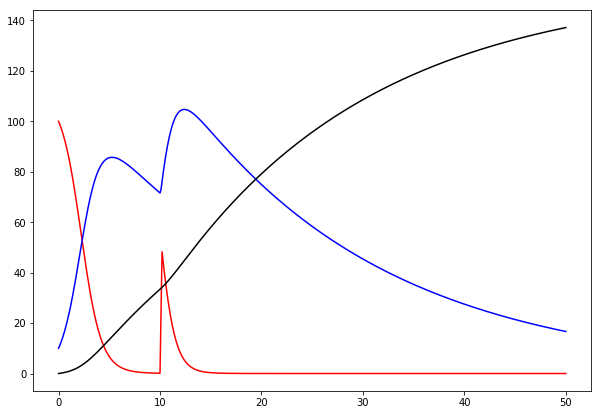

In [48]:
t0, tf, dt = 0, 50, 1e-1 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
S0, I0, R0 = 100, 10, 0  

p1 = SIReuler(t0, tf, dt, S0, I0, R0)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,2],'b', p1[:,0],p1[:,3],'k');

In [57]:
def SEuler(t,S,I,beta):
    return -beta*S*I
def IEuler(t,I,S,beta,eta):
    return beta*S*I-eta*I
def REuler(t,I,eta):
    return eta*I

def SIReuler(t0, tf, dt, S0, I0, R0):
    t, S, I, R= t0, S0, I0, R0
    beta=.01
    eta=.05
    points = [[t,S,I,R]]
    while t <= tf:
        S += dt*SEuler(t,S,I,beta)+random.uniform(-1,1)*S0/10
        I += dt*IEuler(t,I,S,beta,eta)
        R += dt*REuler(t,I,eta)
        t += dt               
        points.append([t,S,I,R])
    return np.array(points)

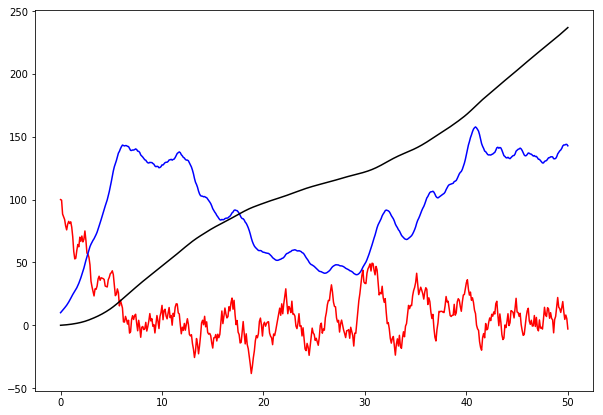

In [58]:
t0, tf, dt = 0, 50, 1e-1 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
S0, I0, R0 = 100, 10, 0  

p1 = SIReuler(t0, tf, dt, S0, I0, R0)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,2],'b', p1[:,0],p1[:,3],'k');

In [65]:
def SEuler(t,S,I,beta, gamma, R):
    return -beta*S*I+gamma*R
def IEuler(t,I,S,beta,eta):
    return beta*S*I-eta*I
def REuler(t,I,eta,gamma, R):
    return eta*I-gamma*R

def SIRSeuler(t0, tf, dt, S0, I0, R0):
    t, S, I, R= t0, S0, I0, R0
    beta=.05
    eta=.05
    gamma=.1
    points = [[t,S,I,R]]
    while t <= tf:
        S += dt*SEuler(t,S,I,beta,gamma,R)
        I += dt*IEuler(t,I,S,beta,eta)
        R += dt*REuler(t,I,eta,gamma,R)
        t += dt               
        points.append([t,S,I,R])
    return np.array(points)

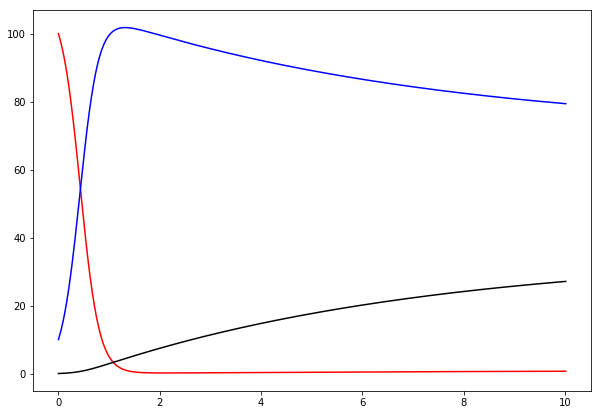

In [70]:
t0, tf, dt = 0, 10, 1e-2 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
S0, I0, R0 = 100, 10, 0  

p1 = SIRSeuler(t0, tf, dt, S0, I0, R0)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,2],'b', p1[:,0],p1[:,3],'k');

In [68]:
p1[:,3]

array([0.00000000e+00, 5.24625000e-03, 1.07442623e-02, ...,
       2.70822573e+01, 2.70948873e+01, 2.71074981e+01])

## Allen Model SIS

In [102]:
def SEuler(t,S,I,beta, b, gamma, N):
    return -beta*S*I/N+(b+gamma)*I
def IEuler(t,I,S,beta,b,gamma,N):
    return beta*S*I/N-(b+gamma)*I

def SISeuler(t0, tf, dt, S0, I0):
    t, S, I, N= t0, S0, I0, S0+I0
    beta=.5
    b=.2
    gamma=.2
    points = [[t,S,I]]
    while t <= tf:
        S += dt*SEuler(t,S,I,beta,b,gamma,N)
        I += dt*IEuler(t,I,S,beta,b,gamma,N)
        t += dt               
        points.append([t,S,I])
    return np.array(points)

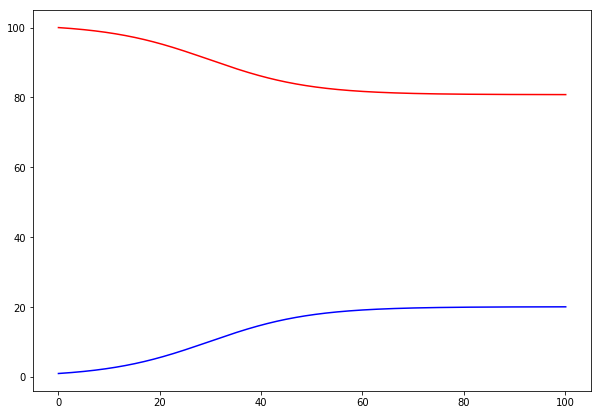

In [103]:
t0, tf, dt = 0, 100, 1e-1 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
S0, I0, = 100, 1 

p1 = SISeuler(t0, tf, dt, S0, I0)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,2],'b');

In [101]:
p1[:,1]

array([100.        ,  99.99049505,  99.98090455, ...,  80.81803004,
        80.81785079,  80.81767333])

## Allen SIRS

In [120]:
def SEuler(t,S,I,beta, b, gamma, N,R):
    return -beta*S*I/N+b*(I+R)
def IEuler(t,I,S,beta,b,gamma,N):
    return beta*S*I/N-(b+gamma)*I
def REuler(t,I,R,gamma, b):
    return gamma*I-b*R

def SIRSeuler(t0, tf, dt, S0, I0, R0):
    t, S, I, R, N= t0, S0, I0, R0, S0+I0+R0
    beta=.5
    b=.25
    gamma=.1
    points = [[t,S,I,R]]
    while t <= tf:
        S += dt*SEuler(t,S,I,beta, b, gamma, N,R)
        I += dt*IEuler(t,I,S,beta,b,gamma,N)
        R += dt*REuler(t,I,R,gamma,b)
        t += dt               
        points.append([t,S,I,R])
    return np.array(points)

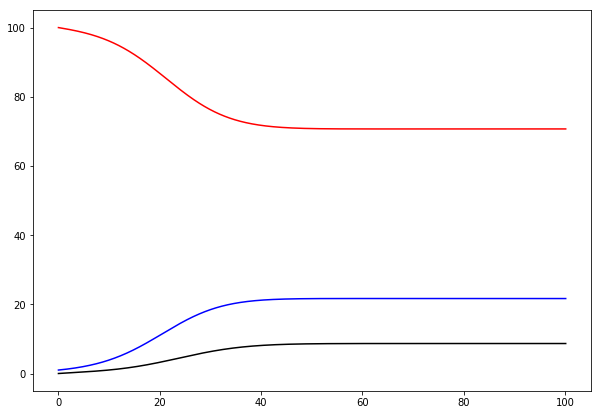

In [121]:
t0, tf, dt = 0, 100, 1e-1 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
S0, I0, R0 = 100, 1, 0

p1 = SIRSeuler(t0, tf, dt, S0, I0, R0)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,2],'b', p1[:,0],p1[:,3],'k');

In [119]:
p1[-1,3]

0.008023997740927779

## ME

In [136]:
def SEuler(t,S,I,beta, b, gamma, N,R):
    return -beta*S*I/N+b*(I+R)
def IEuler(t,I,S,beta,b,gamma,N):
    return beta*S*I/N-(b+gamma)*I
def REuler(t,I,R,gamma, b):
    return gamma*I-b*R

def SIRSeuler(t0, tf, dt, S0, I0, R0):
    t, S, I, R, N= t0, S0, I0, R0, S0+I0+R0
    beta=.5
    b=.25
    gamma=.1
    points = [[t,S,I,R]]
    while t <= tf:
        S += dt*SEuler(t,S,I,beta, b, gamma, N,R)+random.uniform(-1,1)*10*np.sin(t)
        I += dt*IEuler(t,I,S,beta,b,gamma,N)
        R += dt*REuler(t,I,R,gamma,b)
        t += dt               
        points.append([t,S,I,R])
    return np.array(points)

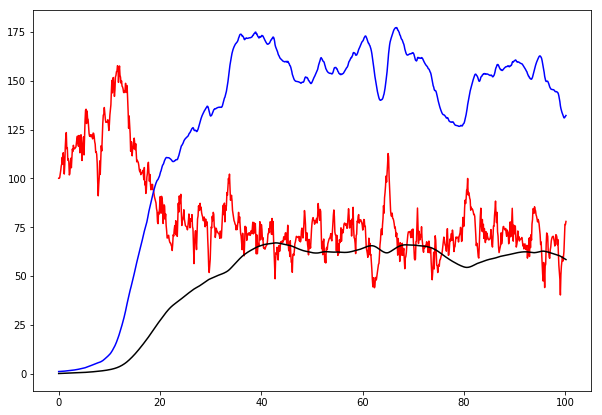

In [138]:
t0, tf, dt = 0, 100, 1e-1 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
S0, I0, R0 = 100, 1, 0

p1 = SIRSeuler(t0, tf, dt, S0, I0, R0)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,2],'b', p1[:,0],p1[:,3],'k');